In [1]:
from numpy.linalg.linalg import inv
import numpy as np
from PricingMethod import PricingMethod

from Option import MaxCallOption
from Option import Option
from StochasticProcess import StochasticProcess, BlackScholesProcess
from RegressionBasis import *
from LongstaffSchwartz import LongstaffSchwartz

In [2]:
import matplotlib.pyplot as plt

In [ ]:
## TEST MAXX  CALL 3 actifs basis la

In [4]:
import numpy as np

# Define the number of dimensions (number of assets)
dim = 3

# Define the risk-free rate for each dimension (asset)
r = np.array([0.05, 0.06, 0.04])

# Define the volatility for each dimension (asset)
vol = np.array([0.1, 0.2, 0.15])

# Define the correlation matrix
corr = np.array([
    [1.0, 0.2, 0.4],
    [0.2, 1.0, 0.5],
    [0.4, 0.5, 1.0]
])

# Define the drift for each dimension (asset)
mu = np.array([0.06, 0.08, 0.07])

# Create the Black-Scholes process
process = BlackScholesProcess(dim=dim, r=r, vol=vol, corr=corr, mu=mu)

# Define the initial asset prices
S0 = np.array([100, 100, 100])

# Define the number of paths and time steps
N = 1000
m = 50

# Define the time horizon
T = 1

# Generate paths
S = process.generate_paths(S0, N, m, T)




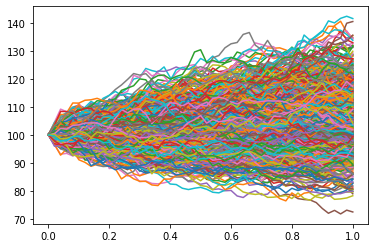

In [5]:
plt.plot(np.linspace(0,T,m+1),S[:,:,0].T)
plt.show()


In [6]:
K = 100


degree = 3
option = MaxCallOption(K, T, S0)
basis = LaguerreBasis(degree)
basis = ChebyshevBasis(degree)
ls = LongstaffSchwartz(option, basis, N)

price = ls.price(option, process, m)

In [7]:
price[0]

19.84720071988501

In [ ]:
## TEST MAXX  CALL 3 actifs qmc  

In [8]:


# Define the number of dimensions (number of assets)
dim = 3

# Define the risk-free rate for each dimension (asset)
r = np.array([0.05, 0.06, 0.04])

# Define the volatility for each dimension (asset)
vol = np.array([0.1, 0.2, 0.15])

# Define the correlation matrix
corr = np.array([
    [1.0, 0.2, 0.4],
    [0.2, 1.0, 0.5],
    [0.4, 0.5, 1.0]
])

# Define the drift for each dimension (asset)
mu = np.array([0.06, 0.08, 0.07])

# Create the Black-Scholes process
process = BlackScholesProcess(dim=dim, r=r, vol=vol, corr=corr, mu=mu)

# Define the initial asset prices
S0 = np.array([100, 100, 100])

# Define the number of paths and time steps
N = 1000
m = 50

# Define the time horizon
T = 1.0

# Generate paths using standard Monte Carlo
S_mc = process.generate_paths(S0, N, m, T)
print("Average asset prices at T using standard MC:")
print(np.mean(S_mc[:, -1, :], axis=0))

# Generate paths using quasi-Monte Carlo (Sobol sequence)
S_qmc_sobol = process.generate_paths_qmc(S0, N, m, T,type_qmc='sobol')
print("Average asset prices at T using QMC (Sobol sequence):")
print(np.mean(S_qmc_sobol[:, -1, :], axis=0))

# Generate paths using quasi-Monte Carlo (Halton sequence)
S_qmc_halton = process.generate_paths_qmc(S0, N, m, T,type_qmc='halton')
print("Average asset prices at T using QMC (Halton sequence):")
print(np.mean(S_qmc_halton[:, -1, :], axis=0))


Average asset prices at T using standard MC:
[107.13899068 107.33884141 108.00982641]
Average asset prices at T using QMC (Sobol sequence):
[105.92237181 110.59780165 107.4172017 ]
Average asset prices at T using QMC (Halton sequence):
[105.84456527 110.53411311 107.3258002 ]


c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_qmc.py:1382: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


In [ ]:
S_qmc_halton.min()

### BASIS :  Chebyshev

In [10]:
# Define the number of dimensions (number of assets)
dim = 3

# Define the risk-free rate for each dimension (asset)
r = np.array([0.05, 0.06, 0.04])

# Define the volatility for each dimension (asset)
vol = np.array([0.1, 0.2, 0.15])

# Define the correlation matrix
corr = np.array([
    [1.0, 0.2, 0.4],
    [0.2, 1.0, 0.5],
    [0.4, 0.5, 1.0]
])

# Define the drift for each dimension (asset)
mu = np.array([0.06, 0.08, 0.07])

# Create the Black-Scholes process
process = BlackScholesProcess(dim=dim, r=r, vol=vol, corr=corr, mu=mu)

# Define the initial asset prices
S0 = np.array([100, 100, 100])
K=100

# Define the number of paths and time steps
N = 1000
m = 50
degree=3
# Define the time horizon
T = 1.0
option = MaxCallOption(K, T, S0)
basis = ChebyshevBasis(degree)
ls = LongstaffSchwartz(option, basis, N,)

ls = LongstaffSchwartz(option, basis, N,)
price = ls.price(option, process, m)
price_sobol = ls.price(option, process, m,qmc='sobol')
price_halton = ls.price(option, process, m,qmc='halton')

In [11]:
print("price mc = ",price[0])
print("price qmc sobol= ",price_sobol[0] )
print("price qmc halton =",price_halton[0])


price mc =  20.355538663604214
price qmc sobol=  23.449017053625866
price qmc halton = 23.20889406067083


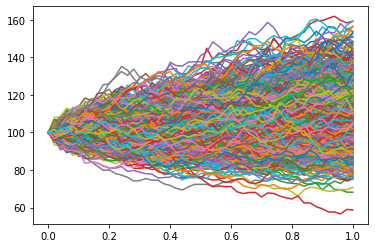

In [12]:
plt.plot(np.linspace(0,T,m+1),S_mc[:,:,2].T)
plt.show()

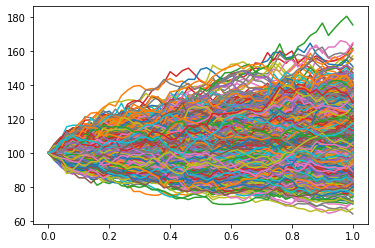

In [13]:
plt.plot(np.linspace(0,T,m+1),S_qmc_sobol[:,:,2].T)
plt.show()

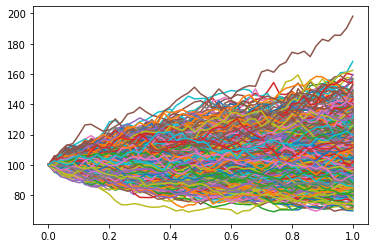

In [14]:
plt.plot(np.linspace(0,T,m+1),S_qmc_halton[:,:,2].T)
plt.show()

### Basis : Laguerre

In [67]:
# Define the number of dimensions (number of assets)
dim = 3

# Define the risk-free rate for each dimension (asset)
r = np.array([0.05, 0.06, 0.04])

# Define the volatility for each dimension (asset)
vol = np.array([0.1, 0.2, 0.15])

# Define the correlation matrix
corr = np.array([
    [1.0, 0.2, 0.4],
    [0.2, 1.0, 0.5],
    [0.4, 0.5, 1.0]
])

# Define the drift for each dimension (asset)
mu = np.array([0.06, 0.08, 0.07])

# Create the Black-Scholes process
process = BlackScholesProcess(dim=dim, r=r, vol=vol, corr=corr, mu=mu)

# Define the initial asset prices
S0 = np.array([100, 100, 100])
K=100
# Define the number of paths and time steps
N = 1000
m = 50
degree=3
# Define the time horizon
T = 1.0
option = MaxCallOption(K, T, S0)
basis = LaguerreBasis(degree)
ls = LongstaffSchwartz(option, basis, N,)

ls = LongstaffSchwartz(option, basis, N,)
price = ls.price(option, process, m)
price_sobol = ls.price(option, process, m,qmc='sobol')
price_halton = ls.price(option, process, m,qmc='halton')

ValueError: operands could not be broadcast together with shapes (4,1) (904,3) 

In [ ]:
print("price mc = ",price[0])
print("price qmc sobol= ",price_sobol[0] )
print("price qmc halton =",price_halton[0])


### Basis: Hermite

In [ ]:
# Define the number of dimensions (number of assets)
dim = 3

# Define the risk-free rate for each dimension (asset)
r = np.array([0.05, 0.06, 0.04])

# Define the volatility for each dimension (asset)
vol = np.array([0.1, 0.2, 0.15])

# Define the correlation matrix
corr = np.array([
    [1.0, 0.2, 0.4],
    [0.2, 1.0, 0.5],
    [0.4, 0.5, 1.0]
])

# Define the drift for each dimension (asset)
mu = np.array([0.06, 0.08, 0.07])

# Create the Black-Scholes process
process = BlackScholesProcess(dim=dim, r=r, vol=vol, corr=corr, mu=mu)

# Define the initial asset prices
S0 = np.array([100, 100, 100])
K=100
# Define the number of paths and time steps
N = 1000
m = 50
degree=3
# Define the time horizon
T = 1.0
option = MaxCallOption(K, T, S0)
basis = HermiteBasis(degree)
ls = LongstaffSchwartz(option, basis, N,)

ls = LongstaffSchwartz(option, basis, N,)
price = ls.price(option, process, m)
price_sobol = ls.price(option, process, m,qmc='sobol')
price_halton = ls.price(option, process, m,qmc='halton')

In [ ]:
print("price mc = ",price[0])
print("price qmc sobol= ",price_sobol[0] )
print("price qmc halton =",price_halton[0])


### BASIS : Polynomial

In [ ]:
# Define the number of dimensions (number of assets)
dim = 3

# Define the risk-free rate for each dimension (asset)
r = np.array([0.05, 0.06, 0.04])

# Define the volatility for each dimension (asset)
vol = np.array([0.1, 0.2, 0.15])

# Define the correlation matrix
corr = np.array([
    [1.0, 0.2, 0.4],
    [0.2, 1.0, 0.5],
    [0.4, 0.5, 1.0]
])

# Define the drift for each dimension (asset)
mu = np.array([0.06, 0.08, 0.07])

# Create the Black-Scholes process
process = BlackScholesProcess(dim=dim, r=r, vol=vol, corr=corr, mu=mu)

# Define the initial asset prices
S0 = np.array([100, 100, 100])
K=100
# Define the number of paths and time steps
N = 1000
m = 50
degree=5
# Define the time horizon
T = 1.0
option = MaxCallOption(K, T, S0)
basis = PolynomialBasis(degree)
ls = LongstaffSchwartz(option, basis, N,)

ls = LongstaffSchwartz(option, basis, N,)
price = ls.price(option, process, m)
price_sobol = ls.price(option, process, m,qmc='sobol')
price_halton = ls.price(option, process, m,qmc='halton')

In [ ]:
print("price mc = ",price[0])
print("price qmc sobol= ",price_sobol[0] )
print("price qmc halton =",price_halton[0])


### Basis MonomialBasis3D : 

In [4]:
# Define the number of dimensions (number of assets)
dim = 3

# Define the risk-free rate for each dimension (asset)
r = np.array([0.05, 0.06, 0.04])

# Define the volatility for each dimension (asset)
vol = np.array([0.1, 0.2, 0.15])

# Define the correlation matrix
corr = np.array([
    [1.0, 0.2, 0.4],
    [0.2, 1.0, 0.5],
    [0.4, 0.5, 1.0]
])

# Define the drift for each dimension (asset)
mu = np.array([0.06, 0.08, 0.07])

# Create the Black-Scholes process
process = BlackScholesProcess(dim=dim, r=r, vol=vol, corr=corr, mu=mu)

# Define the initial asset prices
S0 = np.array([100, 100, 100])
K=100
# Define the number of paths and time steps
N = 1000
m = 50
degree=3
# Define the time horizon
T = 1.0
option = MaxCallOption(K, T, S0)
basis = MonomialBasis3D(degree)
ls = LongstaffSchwartz(option, basis, N,)

ls = LongstaffSchwartz(option, basis, N,)
price = ls.price(option, process, m)
price_sobol = ls.price(option, process, m,qmc='sobol')
price_halton = ls.price(option, process, m,qmc='halton')

In [69]:
S_b =  price[1]

In [ ]:
ls.basis

In [5]:
print("price mc = ",price[0])
print("price qmc sobol= ",price_sobol[0] )
print("price qmc halton =",price_halton[0])

price mc =  19.558702173894986
price qmc sobol=  8.06326244456401
price qmc halton = 8.075794703251661


In [ ]:
price[3]

In [ ]:
type(ls.basis)

In [ ]:
powers = np.arange(1,degree+1)
powers

In [ ]:
degree

In [ ]:
x=np.asarray(S_in_the_money).reshape(-1,1)
(x ** powers).shape

In [ ]:
basis.evaluate(S_in_the_money).shape

In [ ]:
basis

In [ ]:
H=np.zeros((S_in_the_money.shape[0],S_in_the_money.shape[1]*degree+1))
H[:,0]=np.ones(S_in_the_money.shape[0])

N_actif = S_in_the_money.shape[1]
x= S_in_the_money[:,0].reshape(-1,1)


H[:,1:(degree+1)]= x ** powers
debut = degree+1
for i in range(1, N_actif):
    print(i)
   
    x= S_in_the_money[:,i].reshape(-1,1)
    
    fin = debut + degree
    print(debut,fin)
    
    H[:,debut:fin]= x ** powers
    
    debut = fin
    
    fin = debut+ degree


    

In [ ]:
N_actif

In [ ]:
H.shape

In [ ]:
 (1.02643658e+02)**3

In [ ]:
(9.33002969e+01)**3

In [ ]:
S_in_the_money[0,:]

### BASIS : PolynomialBasis3D

In [ ]:
from itertools import combinations_with_replacement
import numpy as np

def H(n, x):
    # Simple function for the sake of the example, replace with your actual orthogonal polynomial
    return x ** n

def generate_basis_functions(n, k):
    basis_functions = []

    for total_degree in range(n+1):
        for degrees in combinations_with_replacement(range(total_degree+1), k):
            basis_functions.append(lambda S_t, degrees=degrees: np.prod([H(d, s) for d, s in zip(degrees, S_t)]))

    return basis_functions

# Test
basis_functions = generate_basis_functions(2, 3)
S_t = [1, 2, 3]

for bf in basis_functions:
    print(bf(S_t))


## PolynomialHortoBasis3D

In [9]:
# Define the number of dimensions (number of assets)
dim = 3

# Define the risk-free rate for each dimension (asset)
r = np.array([0.05, 0.06, 0.04])

# Define the volatility for each dimension (asset)
vol = np.array([0.1, 0.2, 0.15])

# Define the correlation matrix
corr = np.array([
    [1.0, 0.2, 0.4],
    [0.2, 1.0, 0.5],
    [0.4, 0.5, 1.0]
])

# Define the drift for each dimension (asset)
mu = np.array([0.06, 0.08, 0.07])

# Create the Black-Scholes process
process = BlackScholesProcess(dim=dim, r=r, vol=vol, corr=corr, mu=mu)

# Define the initial asset prices
S0 = np.array([100, 100, 100])
K=100
# Define the number of paths and time steps
N = 2000
m = 50
degree=5
# Define the time horizon
T = 1.0
option = MaxCallOption(K, T, S0)
basis = PolynomialHortoBasis3D(degree,LaguerreBasis(degree))
ls = LongstaffSchwartz(option, basis, N,)

ls = LongstaffSchwartz(option, basis, N,)
price = ls.price(option, process, m)
price_sobol = ls.price(option, process, m,qmc='sobol')
price_halton = ls.price(option, process, m,qmc='halton')

In [10]:
print("price mc = ",price[0])
print("price qmc sobol= ",price_sobol[0] )
print("price qmc halton =",price_halton[0])


price mc =  19.265495637053284
price qmc sobol=  23.556784392984195
price qmc halton = 23.172707479300204


### BASIS : PolynomialBasis + Pay_off

In [93]:
dW=np.random.normal(size=(N, m, 3)) * np.sqrt(0.1)
W =np.cumsum(dW,axis=1)
W.shape

(1000, 50, 3)

In [19]:
import pandas as pd

<AxesSubplot:ylabel='Density'>

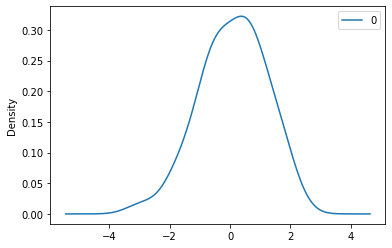

In [60]:
pd.DataFrame(np.random.normal(size=(N,m,3))[0,:,0]).plot.density()

In [48]:
from scipy.stats import qm

from scipy.stats import norm

In [67]:
engine = qmc.Sobol(m, scramble=True,)  # Halton engine

qmc_points = engine.random(N)  # generate QMC points

qmc_points = norm.ppf(qmc_points)


In [70]:
qmc_points.shape

(1000, 50)

In [80]:
res = np.zeros((N,m,3))
for i in range(3):
    engine = qmc.Sobol(m, scramble=True,)  # Halton engine

    qmc_points = engine.random(N)  # generate QMC points

    qmc_points = norm.ppf(qmc_points)
    res[:,:,i]  = qmc_points


In [82]:
res[:,:,i]

array([[-0.61068975,  0.32281031, -0.27217943, ...,  2.02751936,
         0.88099591, -1.66979099],
       [ 0.42054364, -0.86254246,  0.91339062, ..., -0.49601431,
        -0.34211826,  2.49026766],
       [ 1.11025542,  0.9417533 , -1.10262353, ...,  0.02900704,
        -0.77060581,  0.14153464],
       ...,
       [ 1.21088865, -1.7096197 , -0.71570149, ...,  1.39332265,
         1.46235101,  1.73037416],
       [ 0.23176139,  1.34631719,  0.8861184 , ..., -1.0306111 ,
         0.08176838,  0.05358928],
       [-0.04353517, -0.06976104, -0.05208168, ...,  0.19133971,
        -1.26189735, -0.08814315]])

<AxesSubplot:ylabel='Density'>

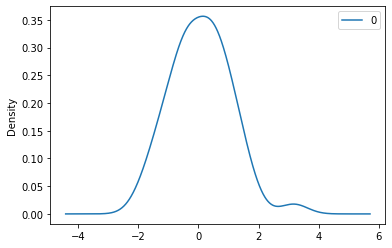

In [87]:
pd.DataFrame(res[4,:,0]).plot.density()

In [40]:
np.random.normal(0,1,size=(N,m,3))[0,:,0].min()


-1.5674686411995111

### BASIS : PolynomialBasis + Pay_off**2 + Pay_off**3

In [ ]:
V = ls.option.payoff(S_qmc_halton[:, m])

In [ ]:
t=m-1
in_the_money = ls.option.payoff(S_qmc_halton[:, t]) > 0
S_in_the_money = S_qmc_halton[in_the_money, t]
S_in_the_money_max = np.max(S_in_the_money, axis=1)  # on peut choisir  une autre vecteur
V_in_the_money = V[in_the_money]

# Compute X and Y for the least squares problem
H = ls.basis.evaluate(S_in_the_money_max)
X = H.T
Y = V_in_the_money.reshape((len(V_in_the_money), 1))

In [ ]:
a_star = inv(X.T @ X) @ X.T @ Y

In [ ]:
S_in_the_money_max

In [ ]:
X.T

In [ ]:
inv(X.T @ X).shape

In [ ]:
(X @ Y).shape

In [ ]:
Y

In [18]:
# A Python program to print all combinations
# with an element-to-itself combination is
# also included
from itertools import combinations_with_replacement,

# Get all combinations of [1, 2, 3] and length 2
comb = combinations_with_replacement([0,1, 2, 3], 3)

l=set()
# Print the obtained combinations
for i in list(comb):
    if sum(i)<=3:
    
        p =  permutations(i,3)
        
        for j in p:
            l.add(j)
print(l)
        

{(0, 1, 0), (2, 1, 0), (0, 3, 0), (0, 0, 1), (0, 2, 1), (1, 0, 1), (1, 1, 0), (3, 0, 0), (2, 0, 1), (0, 1, 2), (0, 0, 3), (0, 2, 0), (0, 0, 0), (1, 0, 0), (2, 0, 0), (0, 1, 1), (1, 2, 0), (0, 0, 2), (1, 0, 2), (1, 1, 1)}


In [22]:
len(l)

20

In [11]:
# A Python program to print all
# permutations of given length
from itertools import permutations
 
# Get all permutations of length 2
# and length 2
perm = permutations([0,1, 2, 3], 3)
 
# Print the obtained permutations
for i in list(perm):
    if sum(i)<=3:
        print (i)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)


In [102]:
from itertools import *
k=3
n=4

degree = n-1
basis = LaguerreBasis(degree)

def P(S,k,n,basis):
    
    B=product(list(range(n)),repeat=k)
    p=[]
    H=basis.evaluate(S)
    #return H
    
    for i in B:
        
        if sum(i)<n and sum(i)!=0:
            #print(i)
            
            init = 1
            
            for j in range(k):
                
                init*=H[i[j],j]
                        
            p.append(init)
    return p
            
        
        



In [144]:
S_b[:,50,2]

array([112.61765939,  97.73335172, 127.04257772,  93.91150661,
        99.45019427, 101.96633102, 109.06860248, 129.07063089,
       105.75826209, 112.63526008,  95.20439654, 111.11740888,
       115.59742105, 100.38041605, 118.91767179, 121.06846642,
       129.28063633,  93.9136186 ,  92.07257446,  97.4867448 ,
       131.74169595, 111.18745527, 123.0838265 ,  94.65523236,
       122.96905655,  75.51665029,  69.8260575 , 126.28578719,
       113.17579152, 128.61639776, 108.73789701,  90.79905428,
        82.85123542,  98.47147411, 102.05202077,  96.01038207,
        84.73466177,  93.07802193,  93.70928125,  91.81830893,
       132.50272098, 123.61694216, 103.5567839 ,  82.11086774,
        95.24591891, 130.35386924, 111.84525791,  97.35249799,
        95.90353281,  92.29610566, 106.27399823,  95.21086544,
       119.05758312, 126.62454314, 115.14941756,  91.54304097,
       102.26794289, 125.98329058, 116.19317311,  98.48600052,
       100.8156124 , 104.09431026, 120.40054008,  90.75

In [143]:
-112.61765939+1

-111.61765939

In [129]:
def Matrice_P(S_,n, basis):
    
    M_p = []
    k= len(S_[0])
    degree = n-1
    
    for Nmc in range( S_.shape[0] ): 
        
        M_p.append(P(S_[Nmc],k,n,basis))
    
    return np.array(M_p)
    

In [141]:
res =Matrice_P(S_b[:,50],n=4,basis=basis)
#res

In [149]:
#res[:,0]+S_b[:,50,2]

In [119]:
S=np.array([1,2,3])

res = P(S,k,n,basis)


In [150]:
#res

In [152]:
k=3
n=4

degree = n-1
basis = ChebyshevBasis(degree)

In [153]:
res =Matrice_P(S_b[:,50],n=4,basis=basis)

In [154]:
res

array([[1.12617659e+02, 2.53644744e+04, 5.71286286e+06, ...,
        2.08065836e+06, 1.92189128e+06, 3.55145582e+06],
       [9.77333517e+01, 1.91026161e+04, 3.73382766e+06, ...,
        2.63970902e+06, 3.11322840e+06, 6.27747356e+06],
       [1.27042578e+02, 3.22786331e+04, 8.20139447e+06, ...,
        2.86669708e+06, 2.79542294e+06, 4.79362170e+06],
       ...,
       [1.05258616e+02, 2.21577525e+04, 4.66448347e+06, ...,
        2.72804007e+06, 2.99388154e+06, 5.90071491e+06],
       [1.71014748e+02, 5.84910878e+04, 2.00055062e+07, ...,
        3.99667003e+06, 4.01410875e+06, 5.05256714e+06],
       [1.10205739e+02, 2.42896096e+04, 5.35359853e+06, ...,
        2.59826953e+06, 2.31825454e+06, 5.11958765e+06]])

In [155]:
res[:,0]-S_b[:,50,2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_geom_brownian_motion(S0, mu, sigma, corr, T, m, N):
    dt = T / m
    dW = np.random.normal(size=(N, m, len(S0))) * np.sqrt(dt)  # increments of standard Brownian motion
    W = np.cumsum(dW, axis=1)  # standard Brownian motion
    if len(S0) > 1:
        L = np.linalg.cholesky(corr)  # Cholesky decomposition of the correlation matrix
        W = np.einsum('nmi,ij->nmj', W, L)  # correlated Brownian motion
    t = np.linspace(dt, T, m)  # time grid
    S = np.zeros((N, m+1, len(S0)))  # initialize S
    S[:, 0, :] = S0  # set initial asset prices
    # apply geometric Brownian motion formula for remaining times
    S[:, 1:, :] = S0[None, None, :] * np.exp((mu[None, None, :] - 0.5 * sigma[None, None, :]**2) * t[None, :, None] + sigma[None, None, :] * W)
    return S

# Test the function
S0 = np.array([100, 100, 100])  # initial prices
S0 =np.array([100])
mu = np.array([0.05, 0.06, 0.07])  # expected returns
mu = np.array([0.05,]) 
sigma = np.array([0.2, 0.2, 0.2])  # volatilities
sigma = np.array([0.2,])  # volatilities
corr = np.array([[1.0, 0.5, 0.3], [0.5, 1.0, 0.5], [0.3, 0.5, 1.0]])  # correlation matrix
corr = np.array([[1.0, ]])  # correlation matrix
T = 1.0  # time horizon
m = 252  # number of time steps
N = 10000  # number of trajectories

# Generate geometric Brownian motion
S = generate_geom_brownian_motion(S0, mu, sigma, corr, T, m, N)

# Compute the mean price at each time step for each asset
mean_price = np.mean(S, axis=0)

# Plot the mean price for each asset
for i in range(len(S0)):
    plt.plot(np.linspace(0, T, m+1), mean_price[:, i], label=f'Asset {i+1}')
plt.title('Mean Asset Price in Multidimensional Geometric Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Mean Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Define the volatilities for the three dimensions
volatilities = np.array([0.1, 0.15, 0.2])

# Define the correlations between the three dimensions
correlations = np.array([
    [1.0, 0.2, 0.4],
    [0.2, 1.0, 0.3],
    [0.4, 0.3, 1.0]
])

# Construct the covariance matrix (sigma)
sigma = np.outer(volatilities, volatilities) * correlations

print(sigma)


In [ ]:

plt.plot(np.linspace(0,T,m+1),S[:,:,0].T)
plt.show()

In [ ]:
t= np.linspace(0,5,100)
t[0:1]

In [ ]:
r = np.array([0.05, 0.05, 0.05])
r = np.array([0.01,])
S0 = np.array([100, 100, 100])
S0 =np.array([100])
mu = np.array([0.05, 0.05, 0.05])
mu = r
sigma = np.array([[0.04, 0.01, 0.01], [0.01, 0.04, 0.01], [0.01, 0.01, 0.04]])
sigma = np.array([[0.]])# Covariance matrix
K = 105
T = 3
N = 1000
m = 50
degree = 3

# Objects
option = MaxCallOption(K, T, S0)

process = BlackScholesProcess(len(S0), r, sigma, mu)
#basis = ChebyshevBasis(degree)
basis = LaguerreBasis(degree)
ls = LongstaffSchwartz(option, basis, N)

price = ls.price(option, process, m)
#print('The max-call option price is', price)

In [ ]:

# Define the parameters
S0 = 100  # initial price
K = 105
r = 0.05  # risk-free rate
sigma = 0.2  # volatility
dim = 3  # dimension
N = 10000  # number of trajectories
m = 252  # number of time steps
T = 1  # time horizon
corr = 0.5  # correlation
mu=0.06
degree = 3
# Create covariance matrix
cov = sigma**2 * (corr * np.ones((dim, dim)) + (1-corr) * np.eye(dim))

# Objects
option = MaxCallOption(K, T, S0)

process = BlackScholesProcess(dim, r, sigma=cov, mu=np.full(dim, mu))
#basis = ChebyshevBasis(degree)
basis = LaguerreBasis(degree)
ls = LongstaffSchwartz(option, basis, N)

price = ls.price(option, process, m)
#print('The max-call option price is', price)


In [ ]:
sigma

In [ ]:
S= price.copy()


In [ ]:
len(S[S<100])

In [ ]:
np.std(S)

In [ ]:
#Initialisation des valeurs de l’option
#V=np.maximum(np.max(S[:,m-1,],axis=1) - K, 0)
V= ls.option.payoff(S[:,m-1,])

In [ ]:
for t in range(m - 2, 0, -1):
    # Select in-the-money paths
    in_the_money = ls.option.payoff(S[:, t]) > 0 #  ça retourne un vecteur colonne (Nmc, 1)
    
    S_in_the_money = S[in_the_money, t]
    S_in_the_moneymax =np.max(S_in_the_money,axis=1)
    V_in_the_money = V[in_the_money]  # ça retourne un vecteur colonne (<Nmc, 1)
    
    # Compute X and Y for the least squares problem
    H = ls.basis.evaluate(S_in_the_moneymax)
    X = H.T
    Y = V_in_the_money.reshape((len(V_in_the_money),1))

    # Solve the least squares problem
    a_star = inv(X.T @ X) @ X.T @ Y

    # Compute the continuation values
    C_star = X @ a_star
    print(f"C_star  = {C_star }")

    # Update option values where exercise is beneficial
    
    V[in_the_money] = np.where(
        np.diag(ls.option.payoff(S_in_the_money) > C_star),
        ls.option.payoff(S_in_the_money),
        V_in_the_money)

# 4. Compute and return the discounted expected payoff
print (np.exp(-process.r * ls.option.T) * np.mean(V))

In [ ]:
t

In [ ]:
#16.606913670124495

In [ ]:
for t in range(m - 2, 0, -1):
    # Select in-the-money paths
    in_the_money = ls.option.payoff(S[:, t]) > 0 #  ça retourne un vecteur colonne (Nmc, 1)
    
    S_in_the_money = S[in_the_money, t]
    S_in_the_moneymax =np.max(S_in_the_money,axis=1)
    V_in_the_money = V[in_the_money]  # ça retourne un vecteur colonne (<Nmc, 1)
    
    # Compute X and Y for the least squares problem
    H = ls.basis.evaluate(S_in_the_moneymax)
    X = H.T
    Y = V_in_the_money.reshape((len(V_in_the_money),1))

    # Solve the least squares problem
    a_star = inv(X.T @ X) @ X.T @ Y

    # Compute the continuation values
    C_star = X @ a_star
    print(f"C_star  = {C_star }")

    # Update option values where exercise is beneficial
    
    V[in_the_money] = np.where(
        np.diag(ls.option.payoff(S_in_the_money) > C_star*np.exp(process.r*t)),
        ls.option.payoff(S_in_the_money),
        V_in_the_money)

# 4. Compute and return the discounted expected payoff
print ( np.mean(V))

In [ ]:
t

In [ ]:
#17.45836834141376

In [ ]:
color = ['g','b','r']
label =['S1','S2','S3']
plt.figure(figsize=(20,15))
for i in range(1000):
    
    plt.plot(np.linspace(0,T,m),S[i,:,0])
plt.legend()
plt.show()

In [ ]:
# path 2  de mon 3 eme actif

plt.plot(np.linspace(0,T,m),S[:,:,2].T)
plt.show()

In [ ]:
pip install longstaff-schwartz

In [ ]:
from longstaff_schwartz.algorithm import longstaff_schwartz
from longstaff_schwartz.stochastic_process import GeometricBrownianMotion


In [ ]:
# Model parameters
t = np.linspace(0, 1, m)  # timegrid for simulation
r = 0.05  # riskless rate
sigma = 0.05  # annual volatility of underlying
n = 1000  # number of simulated paths

# Simulate the underlying
gbm = GeometricBrownianMotion(mu=r, sigma=sigma)
rnd = np.random.RandomState(1234)
x = gbm.simulate(t, n, rnd)  # x.shape == (t.size, n)

# Payoff (exercise) function
strike = 105

def put_payoff(spot):
    return np.maximum(strike - spot, 0.0)

# Discount factor function
def constant_rate_df(t_from, t_to):
    return np.exp(-r * (t_to - t_from))

# Approximation of continuation value
def fit_quadratic(x, y):
    return np.polynomial.Polynomial.fit(x, y, 2, rcond=None)

# Selection of paths to consider for exercise
# (and continuation value approxmation)
def itm(payoff, spot):
    return payoff > 0

# Run valuation of American put option
npv_american = longstaff_schwartz(x, t, constant_rate_df,
                                  fit_quadratic, put_payoff, itm)

# European put option for comparison
npv_european = constant_rate_df(t[0], t[-1]) * put_payoff(x[-1]).mean()

# Check results
np.round(npv_american, 4)


In [ ]:
S[:,m-1,]

In [ ]:
#np.max(S[:,m-1,],axis=1)

In [ ]:
#np.max(S[:,m-1,:],axis=1)

In [ ]:
#V=np.maximum(np.max(S[:,m-1,],axis=1) - K, 0)

In [ ]:
V.shape

In [ ]:
t=m-2
in_the_money = ls.option.payoff(S[:, t]) >0
S_in_the_money = S[in_the_money, t]

In [ ]:
S_in_the_money

In [ ]:
V_in_the_money = V[in_the_money]
#V_in_the_money

In [ ]:
S_in_the_moneymax =np.max(S_in_the_money,axis=1)
S_in_the_moneymax 

In [ ]:
H = ls.basis.evaluate(S_in_the_moneymax)
H.shape

In [ ]:
Y = V_in_the_money.reshape((len(V_in_the_money),1))
Y

In [ ]:
a_star = inv(X.T @ X) @ X.T @ Y
a_star  # ça retourne un vecteur colonne (degree, 1)

In [ ]:
C_star=X @ a_star # ça retourne un vecteur colonne(Nmc_itm, 1)

In [ ]:
print(ls.option.payoff(S_in_the_money) [0:5])
print(C_star [0:5])

In [ ]:
np.diag(ls.option.payoff(S_in_the_money) > C_star)

In [ ]:
np.greater(ls.option.payoff(S_in_the_money) , C_star)

In [ ]:
# puisqu'on a pris max on doit continuer avec le max 
V[in_the_money] = np.where(
        np.diag(ls.option.payoff(S_in_the_money) > C_star),
        ls.option.payoff(S_in_the_money),
        V_in_the_money)


In [ ]:
-process.r

In [ ]:
C_star

In [ ]:
ls.option.payoff(S_in_the_money) > C_star

In [ ]:
in_the_money.shape

In [ ]:
  V.shape

In [ ]:
ls.option.payoff(S_in_the_money)

In [ ]:
C_star.shape

In [ ]:
in_the_money

In [ ]:
S_in_the_money

In [ ]:
S_in_the_moneymax =np.max(S_in_the_money,axis=1)


In [ ]:
V_in_the_money

In [ ]:
S_in_the_money.shape

In [ ]:
 S_in_the_money[:,0]

In [ ]:
from scipy.special import eval_chebyt, eval_laguerre

In [ ]:
degree=2
H=eval_chebyt(np.arange(degree + 1)[:, None], S_in_the_moneymax).T

In [ ]:
H.shape

In [ ]:
Y

In [ ]:
X=H
X.shape


In [ ]:
X.T.shape

In [ ]:
V_in_the_money.reshape((len(V_in_the_money),1)).

In [ ]:
inv(X.T @ X) @ X.T @V_in_the_money.reshape((len(V_in_the_money),1))

In [ ]:
V_in_the_money.reshape((len(V_in_the_money),1)).T.shape